(225, 400, 3)


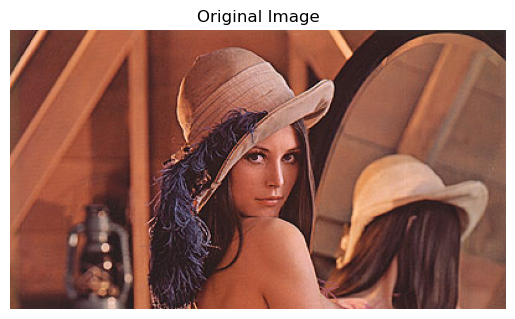

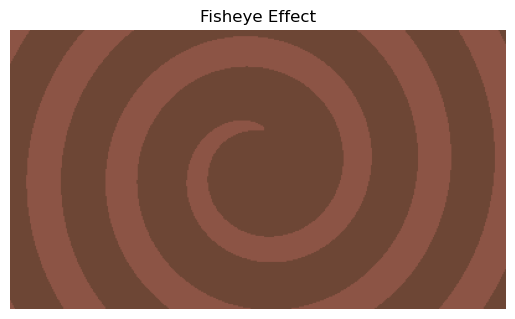

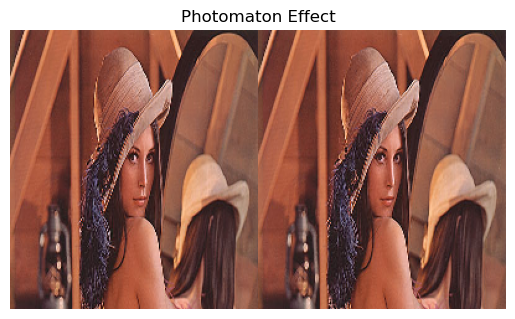

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def display_image(image, title=None):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def fisheye_effect(image, strength=1.0):
    height, width, _ = image.shape
    cy, cx = height // 2, width // 2

    y, x = np.ogrid[:height, :width]
    y = y - cy
    x = x - cx

    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    r_distorted = np.tan(r * strength) / strength
    x_distorted = r_distorted * np.cos(theta) + cx
    y_distorted = r_distorted * np.sin(theta) + cy

    # Ensure that the distorted coordinates are within bounds
    x_distorted = np.clip(x_distorted, 0, width - 1)
    y_distorted = np.clip(y_distorted, 0, height - 1)

    # Interpolate the pixel values using the distorted coordinates
    distorted_image = np.zeros_like(image)
    for i in range(image.shape[2]):
        flattened_y = np.ravel(y_distorted)
        flattened_x = np.ravel(x_distorted)
        flattened_image_channel = np.ravel(image[:, :, i])

        distorted_image[:, :, i] = np.interp(flattened_y, flattened_x, flattened_image_channel).reshape(image.shape[:-1])

    return distorted_image

def swirl_effect(image, strength=1.0):
    height, width, _ = image.shape
    cy, cx = height // 2, width // 2

    y, x = np.ogrid[:height, :width]
    y = y - cy
    x = x - cx

    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)

    r_distorted = r + strength * r
    theta_distorted = theta + strength * r

    x_distorted = r_distorted * np.cos(theta_distorted) + cx
    y_distorted = r_distorted * np.sin(theta_distorted) + cy

    # Ensure that the distorted coordinates are within bounds
    x_distorted = np.clip(x_distorted, 0, width - 1)
    y_distorted = np.clip(y_distorted, 0, height - 1)

    # Interpolate the pixel values using the distorted coordinates
    distorted_image = np.zeros_like(image)
    for i in range(image.shape[2]):
        flattened_y = np.ravel(y_distorted)
        flattened_x = np.ravel(x_distorted)
        flattened_image_channel = np.ravel(image[:, :, i])

        distorted_image[:, :, i] = np.interp(flattened_y, flattened_x, flattened_image_channel).reshape(image.shape[:-1])

    return distorted_image

def photomaton_effect(image):
    height, width, _ = image.shape

    # Create a blank canvas for the photomaton effect
    photomaton_image = np.zeros((height * 2, width * 2, 3), dtype=np.uint8)

    # Arrange the duplicates in a grid
    photomaton_image[:height, :width, :] = image
    photomaton_image[:height, width:, :] = image[:, ::-1, :]
    photomaton_image[height:, :width, :] = image[::-1, :, :]
    photomaton_image[height:, width:, :] = image[::-1, ::-1, :]

    return photomaton_image

def vertical_symetric_effect(image):
    height, width, _ = image.shape
    vertical_symmetric_image = np.zeros((height, width * 2, 3), dtype=np.uint8)
    vertical_symmetric_image[:, :width, :] = image
    vertical_symmetric_image[:, width:, :] = image[:, ::, :]
    return vertical_symmetric_image



def horizontal_symetric_effect(image):
    height, width, _ = image.shape
    horizontal_symmetric_image = np.zeros((height * 2, width, 3), dtype=np.uint8)
    horizontal_symmetric_image[:height, :, :] = image
    horizontal_symmetric_image[height:, :, :] = image[::-1, :, :]
    return horizontal_symmetric_image

def vertical_horizontal_symetric_effect(image):
    height, width, _ = image.shape
    vertical_horizontal_symetric_image = np.zeros((height * 2, width * 2, 3), dtype=np.uint8)
    vertical_horizontal_symetric_image[:height, :width, :] = image
    vertical_horizontal_symetric_image[:height, width:, :] = image[:, ::-1, :]
    vertical_horizontal_symetric_image[height:, :width, :] = image[::-1, :, :]
    vertical_horizontal_symetric_image[height:, width:, :] = image[::-1, ::-1, :]
    return vertical_horizontal_symetric_image

def vertical_copy(image):
    _, width, _ = image.shape
    vertical_copy_image = image.copy()
    vertical_copy_image[:, :width//2, :] = image[:, ::2, :]
    vertical_copy_image[:, width//2:, :] = image[:, 1::2, :]
    return vertical_copy_image

def horizontal_copy(image):
    height, _, _ = image.shape
    horizontal_copy_image = image[:254, :, :]
    horizontal_copy_image[:height//2, :, :] = image[::2, :, :]
    horizontal_copy_image[height//2:, :, :] = image[1::2, :, :]
    return horizontal_copy_image

def photomaton(image):
    height, width, _ = image.shape
    photomaton = horizontal_copy(image)
    photomaton = vertical_copy(photomaton)
    return photomaton

# Load the image
im = np.array(Image.open('./lena.jpg'))
print(im.shape)

# Display the original image
display_image(im, title='Original Image')

# Apply fisheye effect
im_fisheye = fisheye_effect(im, strength=10)
im_photomaton = vertical_copy(im)

# Display the fisheye-distorted image
display_image(im_fisheye.astype(np.uint8), title='Fisheye Effect')
display_image(im_photomaton.astype(np.uint8), title='Photomaton Effect')
